In [9]:
from rdkit import Chem
import networkx as nx

def molecule_to_graph(mol):
    # Create an empty graph
    G = nx.Graph()
    
    # Add nodes for each atom in the molecule
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), element=atom.GetSymbol())
    
    # Add edges for each bond in the molecule
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), order=bond.GetBondType())
    
    return G

# Example usage
smiles = "C" 
mol = Chem.MolFromSmiles(smiles)
graph = molecule_to_graph(mol)

print(graph.nodes(data=True))
print(graph.edges(data=True))


[(0, {'element': 'C'})]
[]


In [22]:
from rdkit.Chem import rdFingerprintGenerator

fingerprint_gen = rdFingerprintGenerator.GetRDKitFPGenerator()
fingerprint = fingerprint_gen.GetFingerprint(mol)

print(fingerprint.ToBitString())

0101100000001100000011111101000001000010000010000010001000000111010000000010100000101000010000010101000011100100100000001010000001000000011101101010000000011010000000100001100000000110001010010010000000100001111000010100100000001001011000000001010000010000100000011000010010101000001010000101000000011011101110110001110110111100111001001000000000010010110000100100010001000100010000111011010001010000000100000000101000000101010000010011110010011100100000100001011000100100100011110001000010100000110111000110010000100101011000000001010110010000000000101101010101100000010100000000001000100000000010110101000100011000101100100000000100000111000100100010000100000000001000011001000001110000000001101010010100010100101010000000000100000000010100010100100101100000100001101101010110111110010000100101100110111000100101010101100010111000000100001000011101000010100000000010101010110001100101100000000001011000101011000000011001010001011011000000110001101100000000000000010001001100001100100100000001000101

In [23]:
from rdkit.Chem import Descriptors

mol_weight = Descriptors.MolWt(mol)
logp = Descriptors.MolLogP(mol)
num_h_donors = Descriptors.NumHDonors(mol)
num_h_acceptors = Descriptors.NumHAcceptors(mol)
tpsa = Descriptors.TPSA(mol)

print(f"Molecular weight: {mol_weight}")
print(f"logP: {logp}")
print(f"Number of hydrogen bond donors: {num_h_donors}")
print(f"Number of hydrogen bond acceptors: {num_h_acceptors}")
print(f"Topological polar surface area: {tpsa}")


Molecular weight: 260.31499999999994
logP: 2.0332
Number of hydrogen bond donors: 0
Number of hydrogen bond acceptors: 5
Topological polar surface area: 59.08


In [7]:
substructure = Chem.MolFromSmarts("CC")  # Ethyl group
mol = Chem.MolFromSmiles("CCO")  # Ethanol
contains_substructure = mol.HasSubstructMatch(substructure)

print(f"Contains ethyl group: {contains_substructure}")


Contains ethyl group: True


In [35]:
import pandas as pd

# Specify the correct encoding when reading the CSV file
df = pd.read_csv("/usr/scratch/NASA/results/230823_01_Atacama_Soil_300uLDCM_100oC24h_Result.csv", encoding='latin-1')

df.iloc[0]

Name                      1,2,5-THIADIAZOLIDINE-2,5-DICARBOXYLIC ACID, 3...
R.T. (s)                                                        2200, 0.727
Type                                                                Unknown
Base Mass                                                            48.984
Concentration                                                           NaN
Sample Concentration                                                    NaN
Match                                                                   NaN
Quant Masses                                            BPI(48.984026±5ppm)
Quant S/N                                                               5.0
Area                                                                28258.0
Integration Modified                                                    NaN
Quantitation Analyte                                                    NaN
1st Dimension Time (s)                                               2200.0
2nd Dimensio

In [13]:
import networkx as nx
from rdkit import Chem

def molecule_to_graph(mol):
    # Create an empty graph
    G = nx.Graph()
    
    # Add nodes for each atom in the molecule
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), element=atom.GetSymbol())
    
    # Add edges for each bond in the molecule
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), order=str(bond.GetBondType()))
    
    return G

# Example InChI string
inchi = 'InChI=1S/CH4/h1H4'

# Convert InChI to RDKit molecule object
mol = Chem.MolFromInchi(inchi)

# Convert molecule object to SMILES string
graph = molecule_to_graph(mol)

print(graph.nodes(data=True))
print(graph.edges(data=True))


[(0, {'element': 'C'})]
[]


In [5]:
smiles

'C'

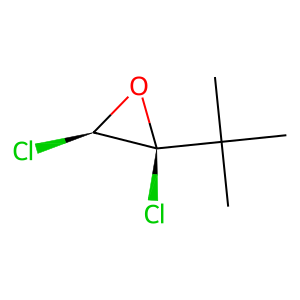

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw

# Example InChI string for caffeine
inchi = "InChI=1S/C6H10Cl2O/c1-5(2,3)6(8)4(7)9-6/h4H,1-3H3/t4-,6-/m0/s1"

# Convert InChI to RDKit molecule object
molecule = Chem.MolFromInchi(inchi)

# Draw the molecule
Draw.MolToImage(molecule)


In [2]:
import pandas as pd

df = pd.read_csv("results/pubchem_links.csv")

In [23]:
import numpy as np
missing_links = df[df['PubChem_Link'].isna()]['Compound'].to_numpy()
np.save("results/missing_pubchem_links.npy", missing_links)


In [4]:
import pandas as pd

# Specify the path to the XLSX file
file_path = "216_2018_1415_MOESM2_ESM.xlsx"

# Read the XLSX file into a pandas DataFrame
df = pd.read_excel(file_path)

# Display the DataFrame

for col in df.columns:
    print(col)


SMILES
Name
CAS no.
Early compound
Group
RT 1
RT 2
Alkane RI
PEG-2I (values for compounds with -999 could not be calculated)
apol
a_acc
a_acid
a_aro
a_base
a_count
a_don
a_donacc
a_heavy
a_hyd
a_nB
a_nBr
a_nC
a_nCl
a_nF
a_nH
a_nI
a_nN
a_nO
a_nP
a_nS
balabanJ
bpol
b_1rotN
b_1rotR
b_ar
b_count
b_double
b_heavy
b_max1len
b_rotN
b_rotR
b_single
b_triple
chi0
chi0v
chi0v_C
chi0_C
chi1
chi1v
chi1v_C
chi1_C
density (MOE)
diameter
FCharge
h_ema
h_emd
h_emd_C
h_log_dbo
h_log_pbo
Kier1
Kier2
Kier3
KierFlex
lip_acc
lip_don
logP(o/w)
logS
mr
opr_nrot
PEOE_PC+
PEOE_PC-
PEOE_RPC+
PEOE_RPC-
Q_PC+
Q_PC-
Q_RPC+
Q_RPC-
Q_VSA_FHYD
Q_VSA_FNEG
Q_VSA_FPNEG
Q_VSA_FPOL
Q_VSA_FPOS
Q_VSA_FPPOS
Q_VSA_HYD
Q_VSA_NEG
Q_VSA_PNEG
Q_VSA_POL
Q_VSA_POS
Q_VSA_PPOS
radius
rings
RPC+
RPC-
SlogP
SMR
TPSA
VAdjEq
VAdjMa
VDistEq
VDistMa
vdw_area
vdw_vol
vsa_acc
vsa_acid
vsa_base
vsa_don
vsa_hyd
vsa_other
vsa_pol
Weight
weinerPath
weinerPol
zagreb
C Ratio
N Ratio
NO Ratio
Hetero Ratio
Halogen Ratio
Number of Aromatic Rings
Numb

In [15]:
from rdkit import Chem

# Specify the path to the SDF file
sdf_file_path = "ESM/External validation set_for PEG-2I model.sdf"

# Read the SDF file
suppl = Chem.SDMolSupplier(sdf_file_path)

# Iterate over the molecules in the SDF file
for mol in suppl:
    # Do something with each molecule
    # For example, you can access properties of the molecule like this:
    name = mol.GetProp("Name")
    smiles = Chem.MolToSmiles(mol)

    rt1 = mol.GetProp("RT1")
    rt2 = mol.GetProp("RT2")
    
    print(f"Molecule {name} has SMILES {smiles} and RT1 {rt1} and RT2 {rt2}")


Molecule Aldrin has SMILES ClC1=C(Cl)C2(Cl)C3C4C=CC(C4)C3C1(Cl)C2(Cl)Cl and RT1 2045 and RT2 3.3499999
Molecule delta-BHC has SMILES ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl and RT1 1860 and RT2 4.1300001
Molecule gamma-BHC (Lindane) has SMILES ClC1C(Cl)C(Cl)C(Cl)C(Cl)C1Cl and RT1 1790 and RT2 3.79
Molecule Chlorbenside has SMILES Clc1ccc(CSc2ccc(Cl)cc2)cc1 and RT1 2190 and RT2 4
Molecule 4,4'-DDD has SMILES Clc1ccc(C(c2ccc(Cl)cc2)C(Cl)Cl)cc1 and RT1 2370 and RT2 3.9100001
Molecule 2,4'-DDE has SMILES ClC(Cl)=C(c1ccc(Cl)cc1)c1ccccc1Cl and RT1 2200 and RT2 3.73
Molecule 2,4'-DDT has SMILES Clc1ccc(C(c2ccccc2Cl)C(Cl)(Cl)Cl)cc1 and RT1 2375 and RT2 3.8800001
Molecule Endosulfan II has SMILES O=S1OC[C@@H]2[C@H](CO1)[C@]1(Cl)C(Cl)=C(Cl)C2(Cl)C1(Cl)Cl and RT1 2350 and RT2 4.23
Molecule Endosulfan ether has SMILES ClC1=C(Cl)C2(Cl)C3COCC3C1(Cl)C2(Cl)Cl and RT1 1895 and RT2 3.6400001
Molecule Endrin has SMILES ClC1=C(Cl)[C@]2(Cl)[C@@H]3[C@H]4C[C@H]([C@@H]5O[C@H]45)[C@@H]3[C@@]1(Cl)C2(Cl)Cl and RT1 2325 and

In [16]:
len(suppl)

329

In [11]:

# Chem.SDMolSupplier('ESM/Training set_for PEG-2I model.sdf')